In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")

In [122]:
df = df = pd.read_csv('train-chennai-sale.csv')

In [123]:
df.head(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200


Step 1 : Data Cleaning


In [124]:
# Checking for Unique Values in categorical data4
#catagorical columns
catagories = ['AREA', 'SALE_COND', 'PARK_FACIL','BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', ]

# Checking for incorrect values
for column in catagories:
    print(df[column].unique())

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
['Yes' 'No' 'Noo']
['Commercial' 'Others' 'Other' 'House' 'Comercial']
['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [125]:
#Replacing the data with correct values

df['AREA'] = df['AREA'].replace({'Karapakam':'Karapakkam','Anna Nagar':'AnnaNagar','Ana Nagar':'AnnaNagar','Ana Nagar':'AnnaNagar',
                                 'Ann Nagar':'AnnaNagar','Chormpet':'Chormpet',
                                 'KK Nagar':'KKNagar','T Nagar':'TNagar','':'',"Chrmpet":'Chormpet','Chrompt':'Chormpet','Adyr':'Adyar',
                                 'Vrlcherry':'Velachery'})
df['SALE_COND'] = df['SALE_COND'].replace({'Ab Normal':'AbNormal','PartiaLl':'Partial','Partiall':'Partial','Adj Land':'AdjLand'})

df['PARK_FACIL'] = df['PARK_FACIL'].replace({"Noo":"No"})
df['BUILDTYPE'] = df['BUILDTYPE'].replace({"Comercial":"Commercial","Other":"Others"})
df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].replace({'AllPub':'All Pub','NoSewr ':"No Sewr",'NoSeWa':"No Sewr"})
df['STREET'] = df['STREET'].replace({'NoAccess':'No Access','Pavd':'Paved'})


In [126]:
#Checking the Values are Corrected
for column in catagories:
    print(df[column].unique())

['Karapakkam' 'AnnaNagar' 'Adyar' 'Velachery' 'Chrompet' 'KKNagar'
 'TNagar' 'Chormpet' 'Velchery']
['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale']
['Yes' 'No']
['Commercial' 'Others' 'House']
['All Pub' 'ELO' 'No Sewr']
['Paved' 'Gravel' 'No Access']
['A' 'RH' 'RL' 'I' 'C' 'RM']


In [127]:
#Removing duplicate values
df.drop_duplicates(inplace=True)


In [128]:
#checking for null values
df.isna().sum()
#df[df.isna().any(axis=1)]

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [129]:
#imputing with values

#Filling missing value with mode for categorical value
df.N_BEDROOM.fillna(df.N_BEDROOM.mode()[0],inplace=True)
df.N_BATHROOM.fillna(df.N_BATHROOM.mode()[0],inplace=True)

#Filling missing value with mean  for continuous value

df.QS_OVERALL.fillna(df.QS_OVERALL.mean(),inplace=True)

#(df.QS_OVERALL.mean() - (df.QS_ROOMS.mean() + df.QS_BEDROOM.mean() + df.QS_BEDROOM.mean())).abs().mean()


In [130]:
df.head(1000)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,All Pub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,AnnaNagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,No Sewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,All Pub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P04363,Karapakkam,1502,15-09-2010,164,2.0,2.0,4,AbNormal,Yes,...,No Sewr,No Access,C,3.3,3.4,2.4,2.970,273757,113509,6677000
996,P07404,Adyar,1016,22-11-2008,24,1.0,1.0,3,AbNormal,No,...,ELO,No Access,RH,4.8,4.4,4.3,4.470,246464,91544,7041840
997,P01451,TNagar,1502,28-04-2012,64,1.0,1.0,4,Normal Sale,No,...,No Sewr,No Access,RH,2.1,5.0,2.7,3.095,320743,179239,9433610
998,P05237,Karapakkam,1497,04-04-2010,170,2.0,2.0,4,Family,No,...,All Pub,No Access,RL,3.1,4.0,3.8,3.650,269441,146968,8164875


In [131]:
#Converting Data Types 

df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])

df["DATE_BUILD"] = pd.to_datetime(df["DATE_BUILD"])

df['N_BEDROOM'] = df['N_BEDROOM'].astype(int)

df['N_BATHROOM'] = df['N_BATHROOM'].astype(int)

In [132]:
#Introducing new column AGE of the property

age =   (pd.to_datetime('today').normalize() - df["DATE_BUILD"]).dt.days/365.25
    
df["age"] = age

In [133]:
df.drop(columns=['PRT_ID','REG_FEE', 'COMMIS', 'DATE_SALE' , 'DATE_BUILD'],inplace=True) 

In [134]:
df["age"].round(1)

0       55.3
1       26.7
2       30.0
3       34.5
4       42.9
        ... 
7104    60.6
7105    26.8
7106    44.7
7107    44.8
7108    61.1
Name: age, Length: 7109, dtype: float64

**Checking for Outliers**


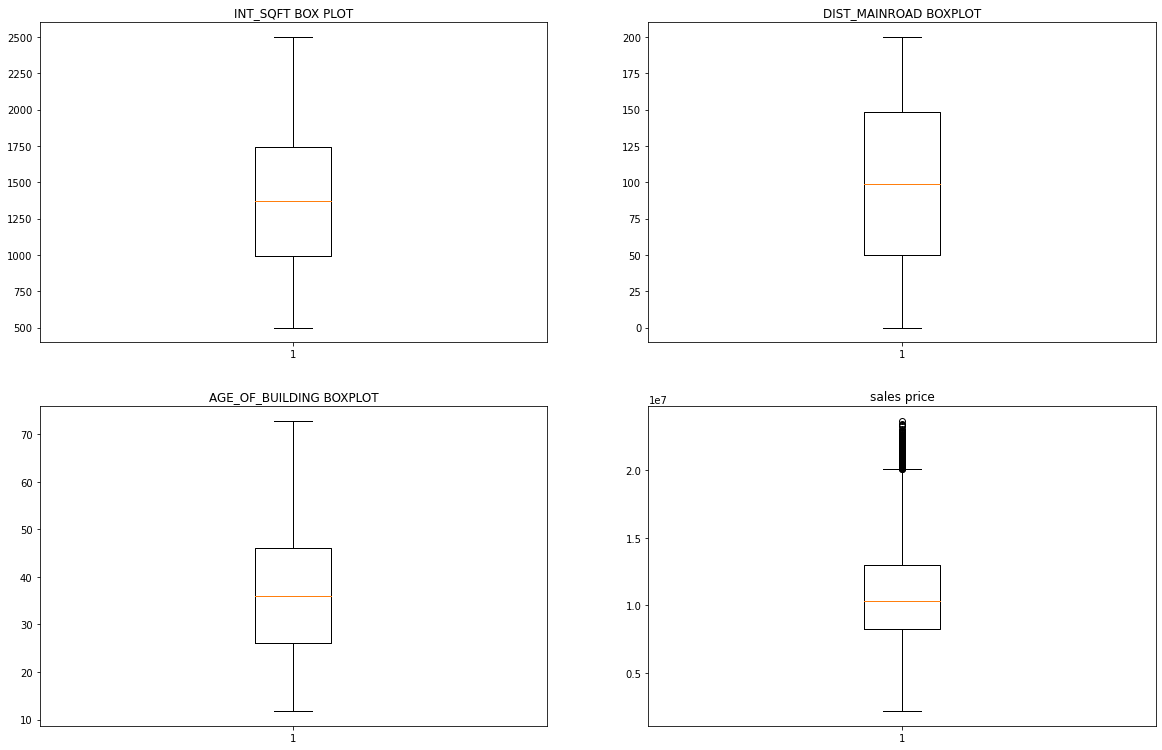

In [135]:
plt.figure(figsize=(20,20))
plt.subplot(321)
plt.boxplot(df["INT_SQFT"])
plt.title("INT_SQFT BOX PLOT")

plt.subplot(322)
plt.boxplot(df["DIST_MAINROAD"])
plt.title("DIST_MAINROAD BOXPLOT")

plt.subplot(323)
plt.boxplot(df["age"])
plt.title("AGE_OF_BUILDING BOXPLOT")

plt.subplot(324)
plt.boxplot(df["SALES_PRICE"])
plt.title("sales price")
plt.show()


 **EXPLORATARY DATA ANALYSIS:**

In [136]:
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,55.307324
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,26.702259
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30.004107
3,Velachery,1855,14,3,2,5,Family,No,Others,No Sewr,Paved,I,4.7,3.9,3.6,4.010,9630290,34.464066
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,42.893908


**Initial Observations:**
Our data has totally 4 continous variable data and rest all others are categorical data.

Text(0.5, 1.0, 'Area Wise Sales')

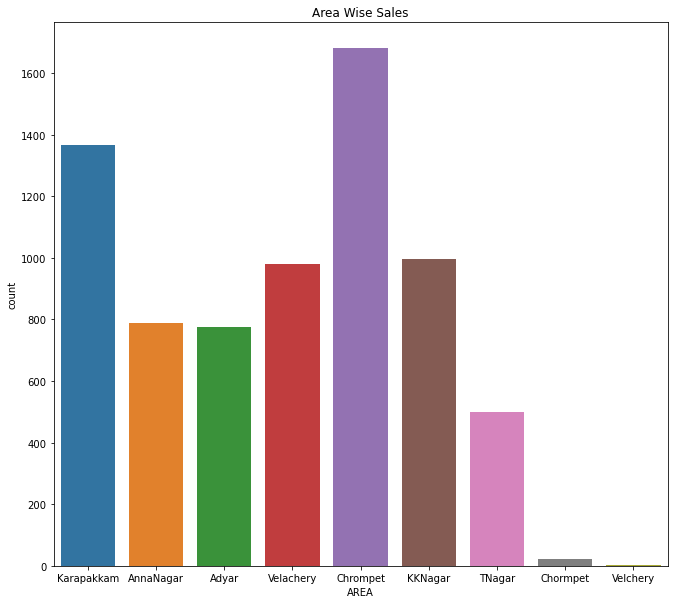

In [137]:
a4_dims = (11, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sb.countplot(data=df,x='AREA')
plt.title('Area Wise Sales')


Text(0.5, 1.0, 'Zones of Chennai')

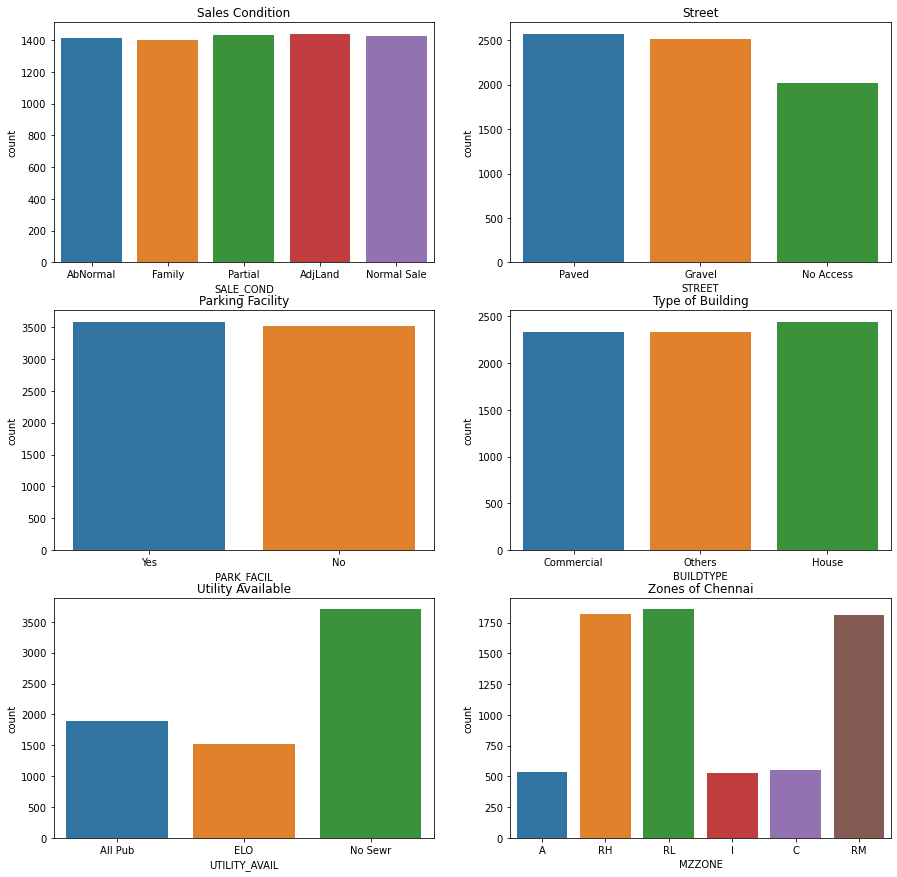

In [138]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sb.countplot(data=df,x='SALE_COND')
plt.title('Sales Condition')

plt.subplot(322)
sb.countplot(data=df,x='STREET')
plt.title('Street')

plt.subplot(323)
sb.countplot(data=df,x='PARK_FACIL')
plt.title('Parking Facility')

plt.subplot(324)
sb.countplot(data=df,x='BUILDTYPE')
plt.title('Type of Building')

plt.subplot(325)
sb.countplot(data=df,x='UTILITY_AVAIL')
plt.title('Utility Available')

plt.subplot(326)
sb.countplot(data=df,x='MZZONE')
plt.title('Zones of Chennai')




Text(0.5, 1.0, 'N_BATHROOM')

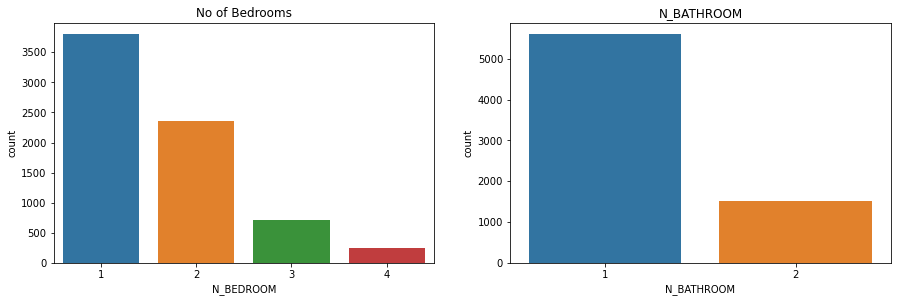

In [139]:
plt.figure(figsize=(15,15))

plt.subplot(321)
sb.countplot(df['N_BEDROOM'])
plt.title('No of Bedrooms')

plt.subplot(322)
sb.countplot(df['N_BATHROOM'])
plt.title('N_BATHROOM')

**Here SINGLE BED ROOM HOUSES GOT SOLD MORE , Bedrooms are inversely propotional to sales**

Text(0.5, 1.0, 'SALES PRICE')

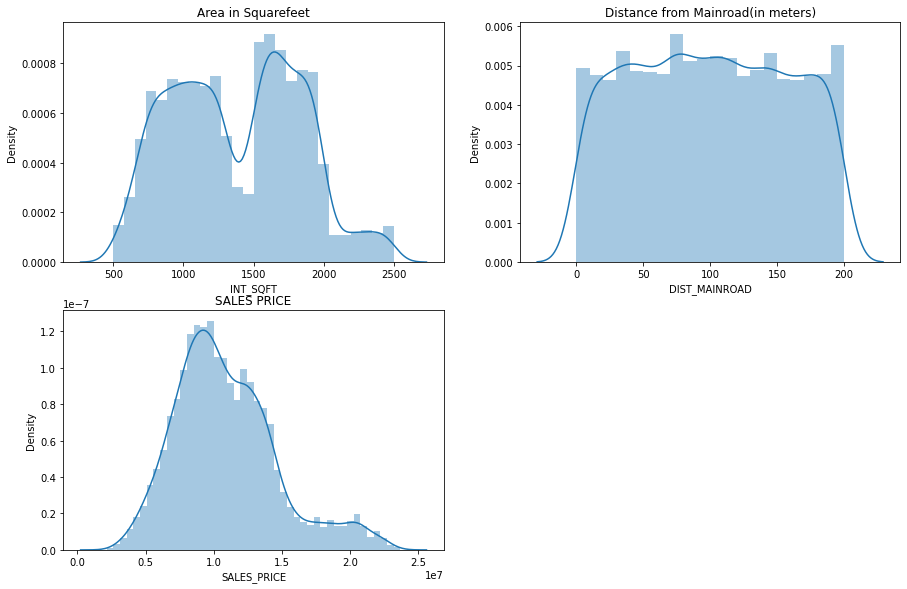

In [143]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sb.distplot(df['INT_SQFT'])
plt.title('Area in Squarefeet')

plt.subplot(322)
sb.distplot(df['DIST_MAINROAD'])
plt.title('Distance from Mainroad(in meters)')

plt.subplot(323)
sb.distplot(df['SALES_PRICE'])
plt.title('SALES PRICE')

**Checking Feature vs Targe Variable**

Text(0.5, 1.0, 'DIST_MAINROAD vs SALES_PRICE')

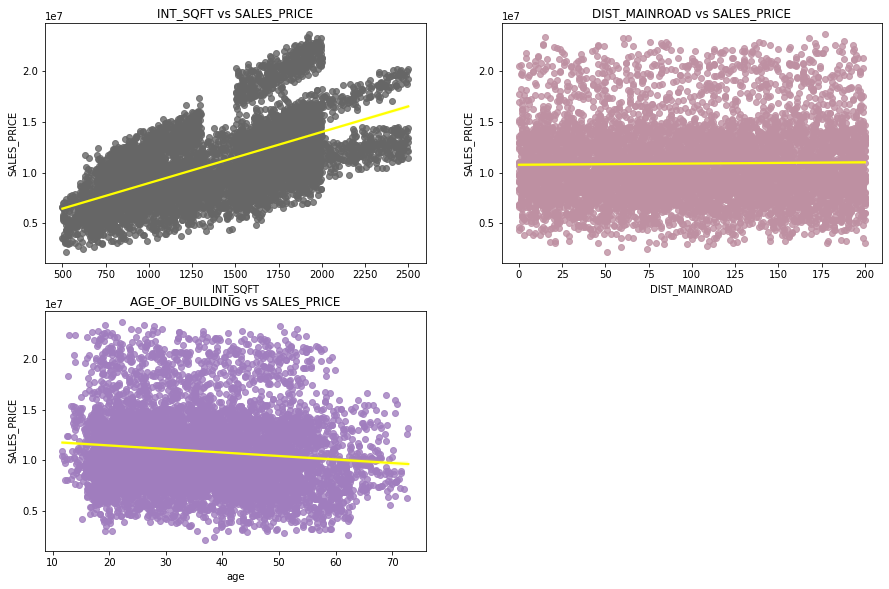

In [156]:
plt.figure(figsize=(15,15))
plt.subplot(323)
sb.regplot(x = df["age"], y =df["SALES_PRICE"], scatter_kws={"color" : "#a07dbe"}, line_kws={"color":"yellow"})
plt.title("AGE_OF_BUILDING vs SALES_PRICE")

plt.subplot(321)
sb.regplot(x = df["INT_SQFT"], y =df["SALES_PRICE"], scatter_kws={"color" : "#666"}, line_kws={"color":"yellow"})
plt.title("INT_SQFT vs SALES_PRICE")

plt.subplot(322)
sb.regplot(x = df["DIST_MAINROAD"], y =df["SALES_PRICE"], scatter_kws={"color" : "#be90a2"}, line_kws={"color":"yellow"})
plt.title("DIST_MAINROAD vs SALES_PRICE")



Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'age'],
      dtype='object')


<AxesSubplot:xlabel='PARK_FACIL', ylabel='SALES_PRICE'>

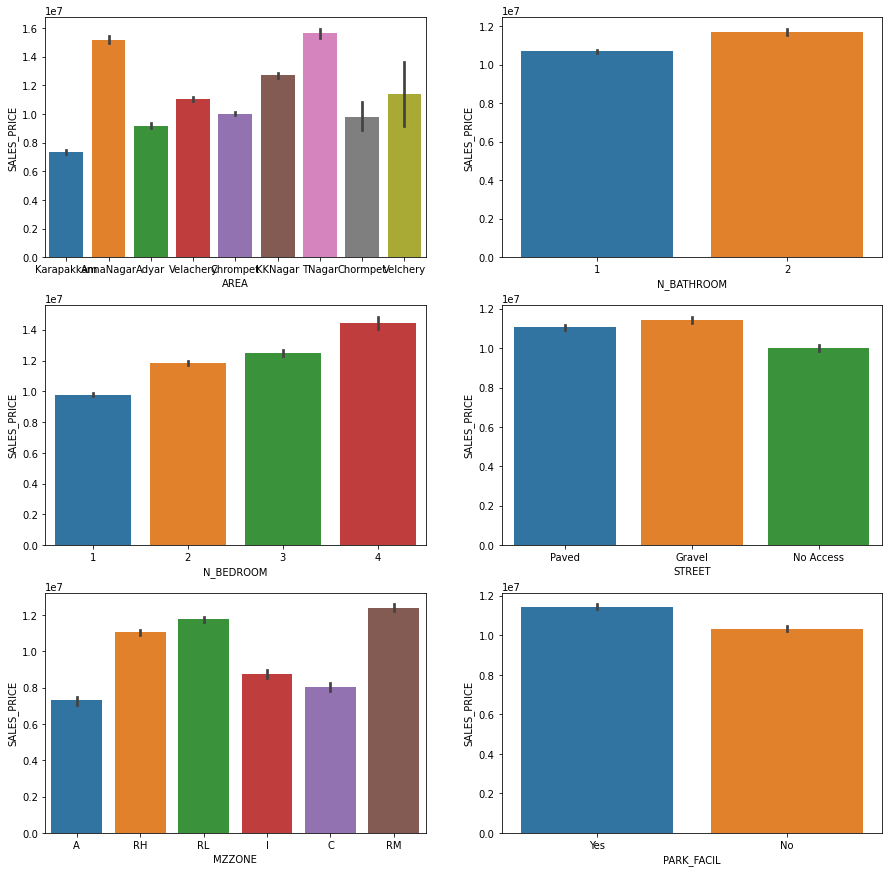

In [186]:
#Checking Area VS Sales
plt.figure(figsize=(15,15))
print(df.columns)

plt.subplot(321)
sb.barplot(x=df["AREA"],y=df["SALES_PRICE"])


plt.subplot(322)
sb.barplot(x=df["N_BATHROOM"],y=df["SALES_PRICE"])

plt.subplot(323)
sb.barplot(x=df["N_BEDROOM"],y=df["SALES_PRICE"])

plt.subplot(324)
sb.barplot(x=df["STREET"],y=df["SALES_PRICE"])

plt.subplot(325)
sb.barplot(x=df["MZZONE"],y=df["SALES_PRICE"])

plt.subplot(326)
sb.barplot(x=df["PARK_FACIL"],y=df["SALES_PRICE"])






Text(0.5, 1.0, 'N_ROOM vs SALES_PRICE')

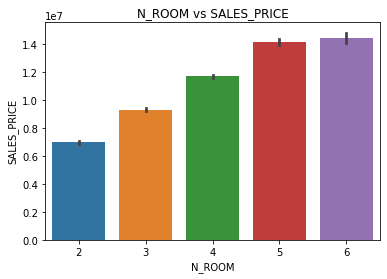

In [189]:
sb.barplot(x=df.N_ROOM,y=df.SALES_PRICE,order=df.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM'])
plt.title('N_ROOM vs SALES_PRICE')

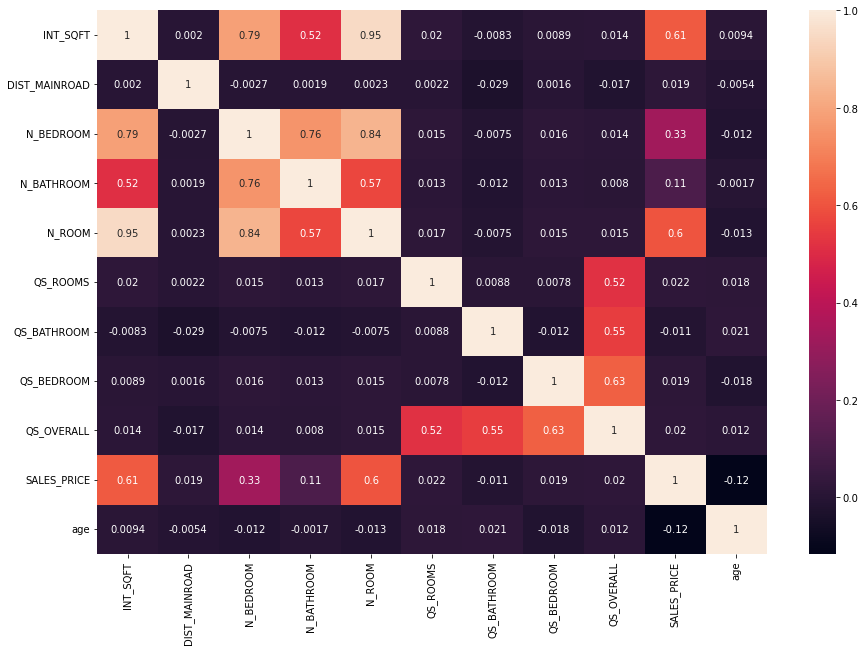

In [191]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(), annot=True)
plt.show()

# **Encoding**

In [192]:
df1=df.copy(deep=True)

In [193]:
df1

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,age
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,All Pub,Paved,A,4.0,3.9,4.9,4.330,7600000,55.307324
1,AnnaNagar,1986,26,2,1,5,AbNormal,No,Commercial,All Pub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,26.702259
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,30.004107
3,Velachery,1855,14,3,2,5,Family,No,Others,No Sewr,Paved,I,4.7,3.9,3.6,4.010,9630290,34.464066
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,All Pub,Gravel,C,3.0,2.5,4.1,3.290,7406250,42.893908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1,1,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,5353000,60.635181
7105,Velachery,1897,52,3,2,5,Family,Yes,Others,No Sewr,No Access,RH,3.6,4.5,3.3,3.920,10818480,26.833676
7106,Velachery,1614,152,2,1,4,Normal Sale,No,House,No Sewr,Gravel,I,4.3,4.2,2.9,3.840,8351410,44.651608
7107,Karapakkam,787,40,1,1,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,8507000,44.821355


In [196]:
#Label Encoding

df1["STREET"] = df1["STREET"].replace({"No Access": 0,"Paved": 1, "Gravel": 2})

df1["MZZONE"] = df1["MZZONE"].replace({"A": 0,"C": 1, "I": 2, "RH": 3, "RL": 4, "RM" : 5})

df1["PARK_FACIL"] = df1["PARK_FACIL"].replace({"No": 0, "Yes": 1})

In [197]:
df1 = pd.get_dummies(df1, columns=["BUILDTYPE","AREA","SALE_COND","UTILITY_AVAIL"])

# **SPLITTING THE DATASET:**

In [210]:
from sklearn.model_selection import train_test_split
X=df1.drop(['SALES_PRICE'],axis=1)
Y=df1['SALES_PRICE']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=1)


In [211]:
x_train.shape , x_test.shape , y_train.shape ,y_test.shape

((5687, 33), (1422, 33), (5687,), (1422,))

**Machine Learning Implementation**

In [213]:
#Linear Expression Implementation
from sklearn.linear_model import LinearRegression
#Training the model
lr=LinearRegression()
lr.fit(x_train,y_train)
#Prediction
y_pred = lr.predict(x_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
5492,18543840,1.756703e+07
3039,7049500,6.258311e+06
2252,7660600,7.198745e+06
2488,14090500,1.477713e+07
4146,6576375,5.857633e+06
...,...,...
4994,9184130,9.779046e+06
5874,16686780,1.583315e+07
2011,6505500,6.203698e+06
1380,9396600,9.193332e+06


In [215]:
#Getting Accuracy
from sklearn import metrics
lr1 = metrics.r2_score(y_test,y_pred)
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")

R2- SCORE FOR LINEAR REGRESSION: 95.99 %


# **2. DECISION TREE MODEL**

In [307]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [308]:
#First, we must identify the proper depth for decision tree model.
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,100]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(x_train, y_train) # the model is trained
  valAccuracy = cross_val_score(dt, x_train, y_train, cv=10, scoring = make_scorer(metrics.r2_score))
  print("DEPTH: ",depth,"R2-Score: ",np.mean(valAccuracy))

DEPTH:  1 R2-Score:  0.29611035733678037
DEPTH:  2 R2-Score:  0.6219516140652209
DEPTH:  3 R2-Score:  0.7681031834783236
DEPTH:  4 R2-Score:  0.8343144995352297
DEPTH:  5 R2-Score:  0.8878446090714833
DEPTH:  6 R2-Score:  0.9196823522298443
DEPTH:  7 R2-Score:  0.9398937358086725
DEPTH:  8 R2-Score:  0.9506420468293255
DEPTH:  9 R2-Score:  0.956879359395022
DEPTH:  10 R2-Score:  0.9588368833513383
DEPTH:  20 R2-Score:  0.9581700619209282
DEPTH:  30 R2-Score:  0.9587355846479879
DEPTH:  40 R2-Score:  0.9586575074038954
DEPTH:  50 R2-Score:  0.9592574316959384
DEPTH:  60 R2-Score:  0.9584421955889562
DEPTH:  100 R2-Score:  0.9584847686050825


In [313]:
dt = DecisionTreeRegressor(max_depth=30)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
result_dt=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_dt})
dt1 = metrics.r2_score(y_test,y_pred_dt)
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")

R2- SCORE FOR DECISION TREE MODEL: 96.35 %


# 3. Random Forest

In [305]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 150, max_depth = 10, max_features='sqrt')
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
result_rf= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
result_rf

,Actual,Predicted
5492,18543840,1.800437e+07
3039,7049500,6.991134e+06
2252,7660600,7.729963e+06
2488,14090500,1.321041e+07
4146,6576375,5.729367e+06
...,...,...
4994,9184130,9.768779e+06
5874,16686780,1.717812e+07
2011,6505500,7.266536e+06
1380,9396600,9.687412e+06


In [306]:
# Calculating Accuracy
from sklearn import metrics
rf1 = metrics.r2_score(y_test,y_pred_rf)
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")

R2- SCORE FOR RANDOM FOREST MODEL : 95.92 %


# **4. XG-BOOST MODEL:**

In [299]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.1,0.12,0.13,0.14,0.15,0.2,0.5,0.7,0.8,0.9,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(x_train,y_train) #train the model
  model.score(x_test, y_test) # scoring the model - r2 squared
  print("Learning rate : ", lr, " Train score : ", model.score(x_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, x_train, y_train)))

Learning rate :  0.01  Train score :  -0.3220088590473651  Cross-Val score :  -0.3333377523723786
Learning rate :  0.02  Train score :  0.8005403598281415  Cross-Val score :  0.7933784342171085
Learning rate :  0.03  Train score :  0.9623203460847767  Cross-Val score :  0.9565982630700459
Learning rate :  0.04  Train score :  0.9888541028042613  Cross-Val score :  0.983720335559571
Learning rate :  0.05  Train score :  0.9947447092844345  Cross-Val score :  0.9900994836784737
Learning rate :  0.1  Train score :  0.9986471076110409  Cross-Val score :  0.995031865952314
Learning rate :  0.1  Train score :  0.9986471076110409  Cross-Val score :  0.995031865952314
Learning rate :  0.12  Train score :  0.9989505082626464  Cross-Val score :  0.9953802787441001
Learning rate :  0.13  Train score :  0.9990153441475136  Cross-Val score :  0.9954218747636121
Learning rate :  0.14  Train score :  0.9990308268563511  Cross-Val score :  0.9954288832279156
Learning rate :  0.15  Train score :  0.999

In [300]:
xg_model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg_model.fit(x_train,y_train) #train the model
xg_model.score(x_test, y_test) # scoring the model - r2 squared

0.988352522952938

In [301]:
XG_pred= model.predict(x_test)
result_XG= pd.DataFrame({"Actual": y_test, "Predicted": XG_pred})

XG1 = metrics.r2_score(y_test,XG_pred)
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2- SCORE FOR XG-BOOST MODEL: 97.54 %


<Figure size 3600x3600 with 0 Axes>

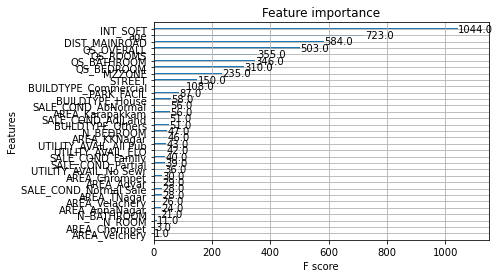

In [302]:
from xgboost import plot_importance
plt.figure(figsize=(50,50))
# plot feature importance
plot_importance(model)
plt.show()

# **BEST MODAL**

In [314]:
print("R2 SCORE FOR ALL MODELS:")
print()
print('R2- SCORE FOR LINEAR REGRESSION:', round((lr1*100),2),"%")
print('R2- SCORE FOR DECISION TREE MODEL:', round((dt1*100),2),"%")
print('R2- SCORE FOR RANDOM FOREST MODEL :', round((rf1*100),2),"%")
print('R2- SCORE FOR XG-BOOST MODEL:', round((XG1*100),2),"%")

R2 SCORE FOR ALL MODELS:

R2- SCORE FOR LINEAR REGRESSION: 95.99 %
R2- SCORE FOR DECISION TREE MODEL: 96.35 %
R2- SCORE FOR RANDOM FOREST MODEL : 95.92 %
R2- SCORE FOR XG-BOOST MODEL: 97.54 %
